Original Dataset

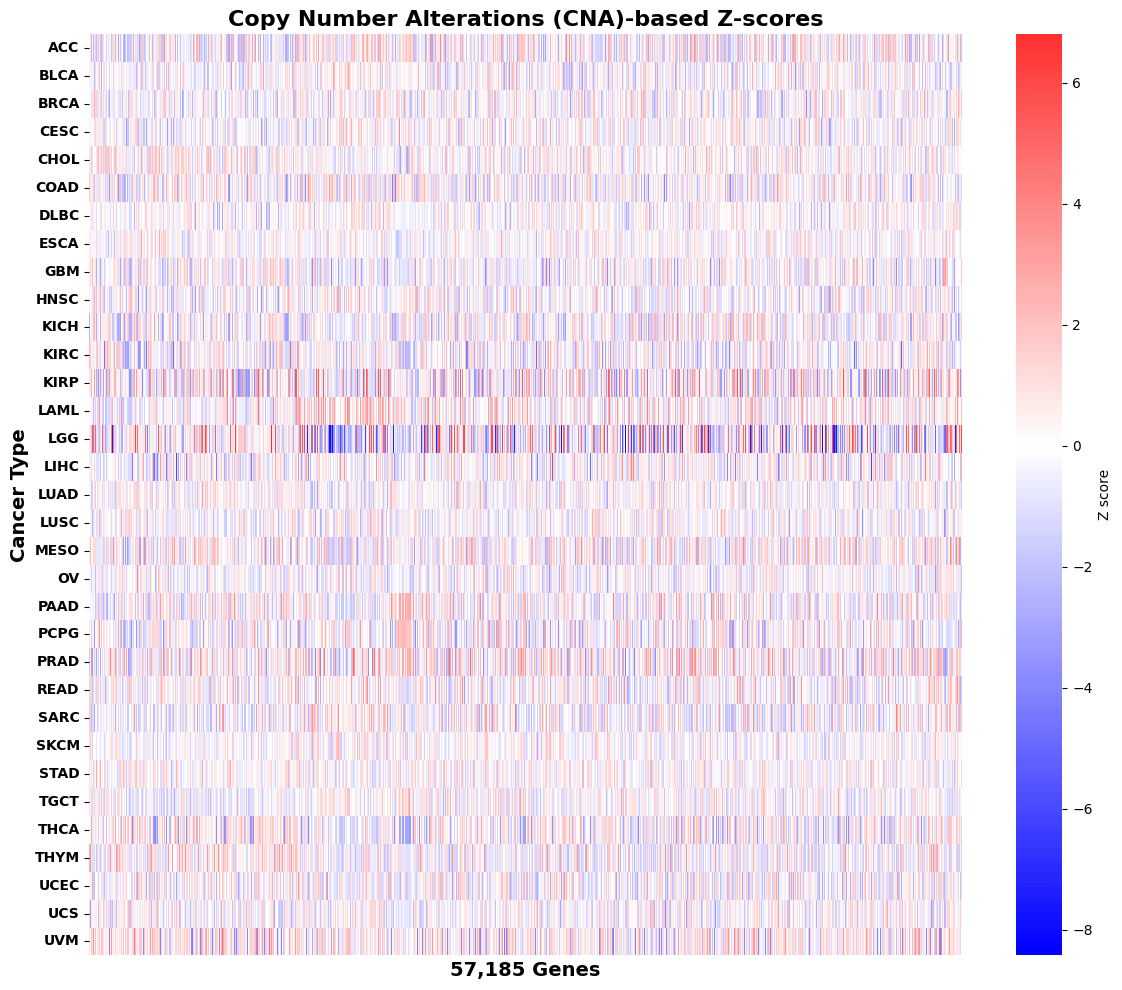

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# loading the data file
df = pd.read_excel("/content/Multivariate - CNA.xlsx", engine='openpyxl')

# setting 'Gene' as the index
df.set_index(df.columns[0], inplace=True)

# dropping the last column 'Stouffer's Z' if it exists
if "Stouffer's Z" in df.columns:
    dfT=df.drop(columns=["Stouffer's Z"], inplace=True)

# transposing so cancer types are rows and genes are columns
dfT = df.T.astype(float)

# plotting the heatmap with gene names hidden on x-axis
plt.figure(figsize=(12, 10))
ax = sns.heatmap(dfT, cmap="bwr", center=0, cbar_kws={"label": "Z score"}, xticklabels=False)
plt.title("Copy Number Alterations (CNA)-based Z-scores", fontsize=16, fontweight='bold')
plt.xlabel("57,185 Genes", fontsize=14, fontweight='bold')
plt.ylabel("Cancer Type", fontsize=14, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')
plt.tight_layout()
plt.show()


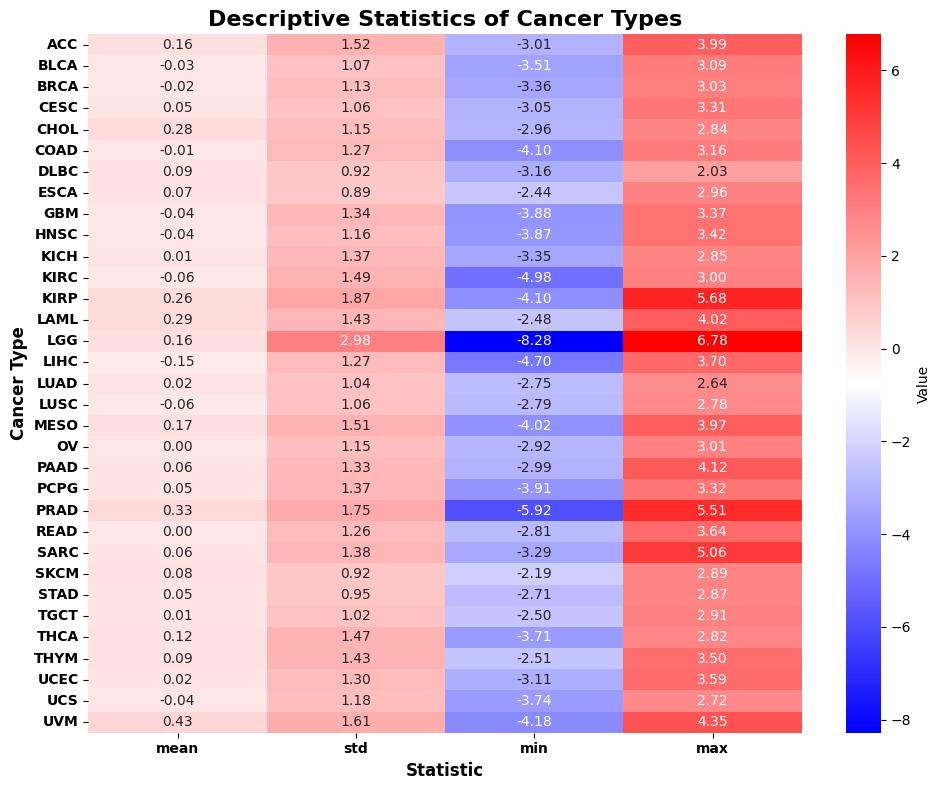

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
df = pd.read_excel("/content/Multivariate - CNA.xlsx", engine='openpyxl')

# dropping non-cancer columns if present
dfCancer = df.drop(columns=["Gene", "Stouffer's Z"], errors="ignore")

# getting descriptive stats and transpose for readability
# rows = cancer types, cols = stats
descStats = dfCancer.describe().T

# filtering only certain statistics (e.g., mean, std, min, max)
descStats = descStats[["mean", "std", "min", "max"]]

# create heatmap with values annotated
plt.figure(figsize=(10, 8))
sns.heatmap(descStats, annot=True, fmt=".2f", cmap="bwr", cbar_kws={'label': 'Value'})
plt.title("Descriptive Statistics of Cancer Types", fontsize=16, fontweight='bold')
plt.xlabel("Statistic", fontsize=12, fontweight='bold')
plt.ylabel("Cancer Type", fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


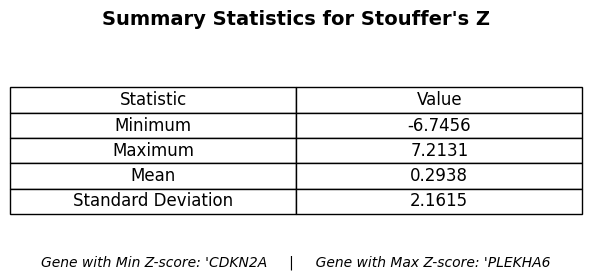

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# laoding the filtered CSV
df = pd.read_excel("/content/Multivariate - CNA.xlsx", engine='openpyxl')

if "Stouffer's Z" in df.columns:
    # converting column to numeric
    df["Stouffer's Z"] = pd.to_numeric(df["Stouffer's Z"], errors='coerce')

    # dropping NaNs just for stats calculation
    stoufferZ = df["Stouffer's Z"].dropna()

    # creating summary stats
    stats = {
        "Statistic": ["Minimum", "Maximum", "Mean", "Standard Deviation"],
        "Value": [stoufferZ.min(), stoufferZ.max(), stoufferZ.mean(), stoufferZ.std()]
    }

    summaryTable = pd.DataFrame(stats)
    summaryTable["Value"] = summaryTable["Value"].round(4)

    # getting genes for min and max Z-score
    minIdx = df["Stouffer's Z"].idxmin()
    maxIdx = df["Stouffer's Z"].idxmax()
    minGene = df.loc[minIdx, "Gene"] if "Gene" in df.columns else "N/A"
    maxGene = df.loc[maxIdx, "Gene"] if "Gene" in df.columns else "N/A"

    # plotting
    fig, ax = plt.subplots(figsize=(6, 2.8))
    ax.axis('off')

    table = ax.table(cellText=summaryTable.values,
                     colLabels=summaryTable.columns,
                     cellLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.5)

    plt.title("Summary Statistics for Stouffer's Z", fontweight='bold', fontsize=14, pad=12)

    # adding gene names below
    plt.figtext(0.5, 0.03, f"Gene with Min Z-score: {minGene}     |     Gene with Max Z-score: {maxGene}",
                ha="center", fontsize=10, style='italic')

    plt.tight_layout()
    plt.show()

else:
    print("'Stouffer's Z' column not found in the dataset.")


Filtered Data

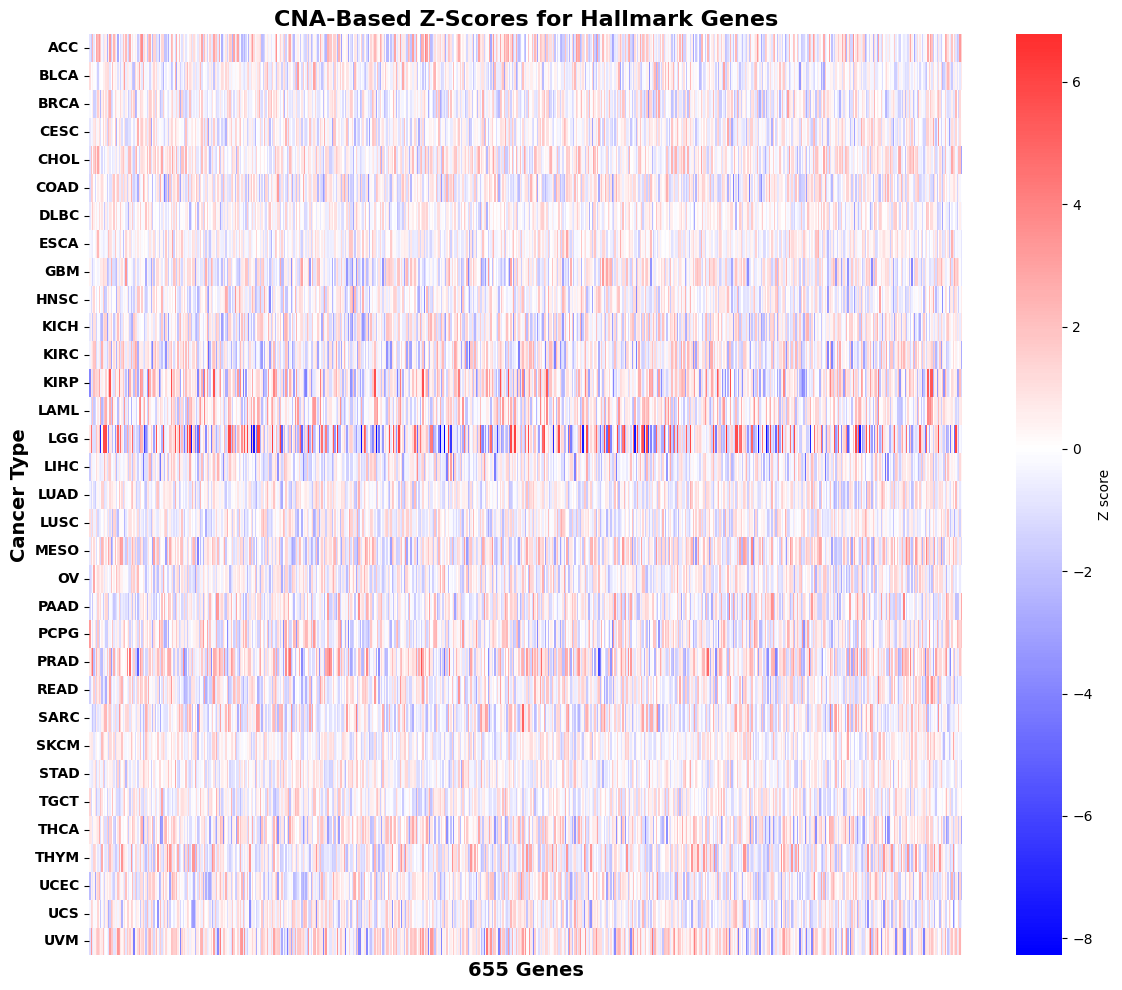

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# laoding the data file
df = pd.read_csv("/content/Multivariate_CNA_filtered_by_hallmark.csv")

# setting 'Gene' as the index
df.set_index(df.columns[0], inplace=True)

# dropping the last column 'Stouffer's Z' if it exists
if "Stouffer's Z" in df.columns:
    df.drop(columns=["Stouffer's Z"], inplace=True)

# transposing so cancer types are rows and genes are columns
dfT = df.T.astype(float)

# plotting the heatmap with x-tick labels hidden
plt.figure(figsize=(12, 10))
ax = sns.heatmap(dfT, cmap="bwr", center=0, cbar_kws={"label": "Z score"}, xticklabels=False)
plt.title("CNA-Based Z-Scores for Hallmark Genes", fontsize=16, fontweight='bold')
plt.xlabel("655 Genes", fontsize=14, fontweight='bold')
plt.ylabel("Cancer Type", fontsize=14, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

plt.tight_layout()
plt.show()


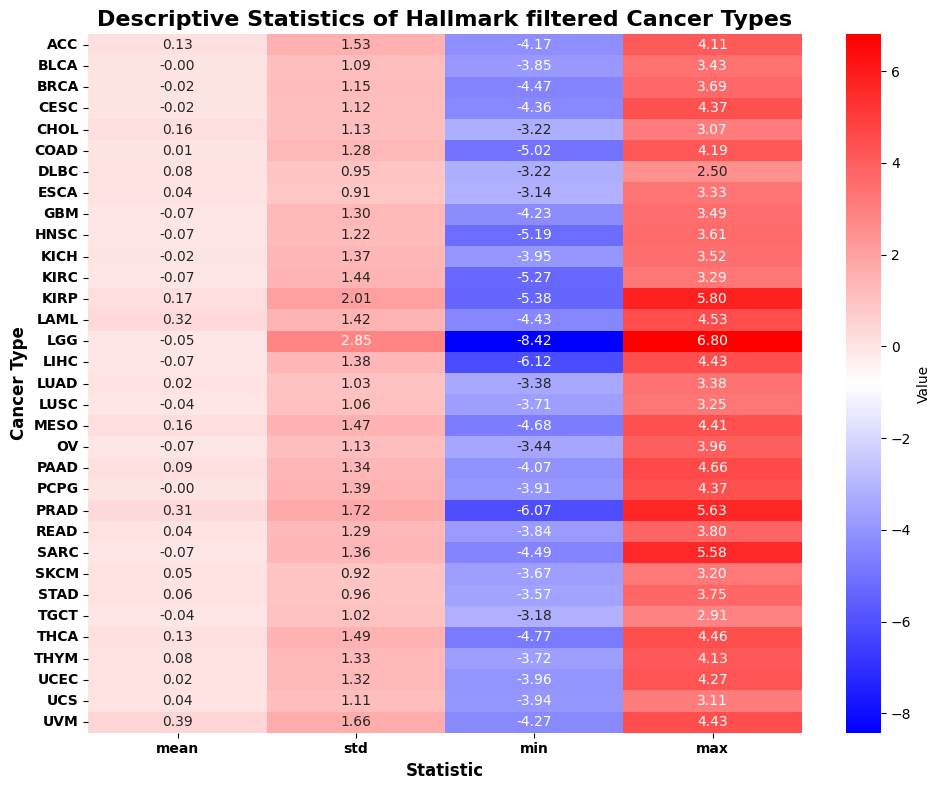

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# laoding dataset
df = pd.read_csv("/content/Multivariate_CNA_filtered_by_hallmark.csv")

# dropping non-cancer columns if present
dfCancer = df.drop(columns=["Gene", "Stouffer's Z"], errors="ignore")

# getting descriptive stats and transpose for readability
# rows = cancer types, cols = stats
descStats = dfCancer.describe().T

# filtering only certain statistics (e.g., mean, std, min, max)
desc_stats = descStats[["mean", "std", "min", "max"]]

# creating heatmap with values annotated
plt.figure(figsize=(10, 8))
sns.heatmap(desc_stats, annot=True, fmt=".2f", cmap="bwr", cbar_kws={'label': 'Value'})
plt.title("Descriptive Statistics of Hallmark filtered Cancer Types", fontsize=16, fontweight='bold')
plt.xlabel("Statistic", fontsize=12, fontweight='bold')
plt.ylabel("Cancer Type", fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


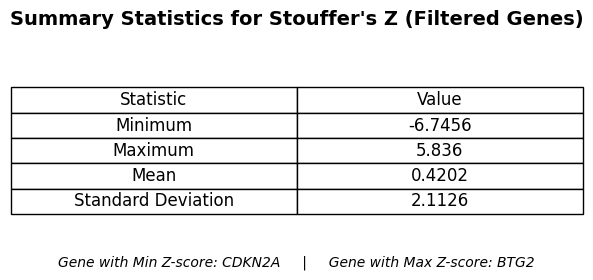

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# laoding the filtered CSV
df = pd.read_csv("/content/Multivariate_CNA_filtered_by_hallmark.csv")

if "Stouffer's Z" in df.columns:
    # converting column to numeric (retain NaNs)
    df["Stouffer's Z"] = pd.to_numeric(df["Stouffer's Z"], errors='coerce')

    # dropping NaNs just for stats calculation
    stoufferZ = df["Stouffer's Z"].dropna()

    # creating summary stats
    stats = {
        "Statistic": ["Minimum", "Maximum", "Mean", "Standard Deviation"],
        "Value": [stoufferZ.min(), stoufferZ.max(), stoufferZ.mean(), stoufferZ.std()]
    }

    summaryTable = pd.DataFrame(stats)
    summaryTable["Value"] = summaryTable["Value"].round(4)

    # getting genes for min and max Z-score
    minIdx = df["Stouffer's Z"].idxmin()
    maxIdx = df["Stouffer's Z"].idxmax()
    minGene = df.loc[minIdx, "Gene"] if "Gene" in df.columns else "N/A"
    maxGene = df.loc[maxIdx, "Gene"] if "Gene" in df.columns else "N/A"

    # plotting
    fig, ax = plt.subplots(figsize=(6, 2.8))
    ax.axis('off')

    table = ax.table(cellText=summaryTable.values,
                     colLabels=summaryTable.columns,
                     cellLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.5)

    plt.title("Summary Statistics for Stouffer's Z (Filtered Genes)", fontweight='bold', fontsize=14, pad=12)

    # adding gene names below
    plt.figtext(0.5, 0.03, f"Gene with Min Z-score: {minGene}     |     Gene with Max Z-score: {maxGene}",
                ha="center", fontsize=10, style='italic')

    plt.tight_layout()
    plt.show()

else:
    print("'Stouffer's Z' column not found in the dataset.")
